In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
sys.path.append('./../../designer/script/')
sys.path.append('./../')
from film import FilmSimple
from spectrum import Spectrum
from design import Design
import os

from analyze_utils.structure import plot_layer_thickness
from optimizer.adam import adam_optimize
import pickle



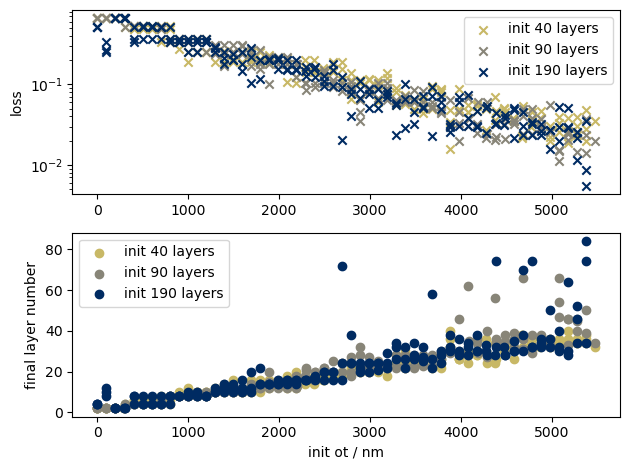

In [46]:


def load_designs(file_dir, filter=lambda x: True) -> list[Design]:
    fname_ls = os.listdir(file_dir)
    designs = []
    for fname in fname_ls:
        if not filter(fname):
            continue
        with open(file_dir + fname, 'rb') as f:
            designs.append(pickle.load(f))
    return designs




fig, (ax, ax2) = plt.subplots(2, 1)


for layer in [40, 90, 190]:

    losses = []
    init_ots = []
    final_layers = []

    dir = './raw_result/back_reflector/SiO2_TiO2-700to1000nm-700nm/'
    for design in load_designs(dir, lambda x: f'_layer{layer}_' in x):
        
        design.film.remove_negative_thickness_layer()
        final_layers.append(design.film.get_layer_number())
        losses.append(design.calculate_loss())
        init_ots.append(design.get_init_ot())

        
    color = cm.get_cmap('cividis')(1 - layer / 200)

    ax.scatter(init_ots, losses, label=f'init {layer} layers', marker='x', color=color)
    ax2.scatter(init_ots, final_layers, label=f'init {layer} layers', color=color)

ax2.set_xlabel('init ot / nm')
ax.set_ylabel('loss')
ax.legend()
ax.set_yscale('log')

ax2.set_ylabel('final layer number')
ax2.legend()
fig.tight_layout()


init layer: 190
init ot: 2489.7461334946884
loss: 0.1264738219066499
init layer: 190
init ot: 2488.9604720408997
loss: 0.09558551673948375
init layer: 190
init ot: 2489.8484045571126
loss: 0.10874083405299984
init layer: 190
init ot: 2589.2961588243447
loss: 0.14941801502403063
init layer: 190
init ot: 2588.4790834779606
loss: 0.09662904272438647
init layer: 190
init ot: 2589.402519093583
loss: 0.17877865074113145
init layer: 190
init ot: 2688.846184154
loss: 0.12406699990149711
init layer: 190
init ot: 2687.997694915022
loss: 0.09205878721812227
init layer: 190
init ot: 2688.956633630053
loss: 0.02045415033633633
init layer: 190
init ot: 2788.396209483656
loss: 0.07663053599581679
init layer: 190
init ot: 2787.516306352082
loss: 0.08764073825941164
init layer: 190
init ot: 2788.5107481665227
loss: 0.04015744650851885
init layer: 190
init ot: 2887.9462348133115
loss: 0.08804919066431025
init layer: 190
init ot: 2887.034917789144
loss: 0.10870432020104424
init layer: 190
init ot: 2888.0

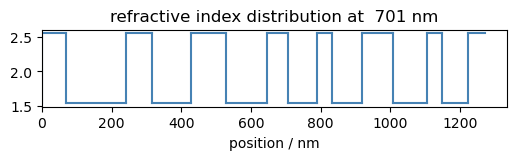

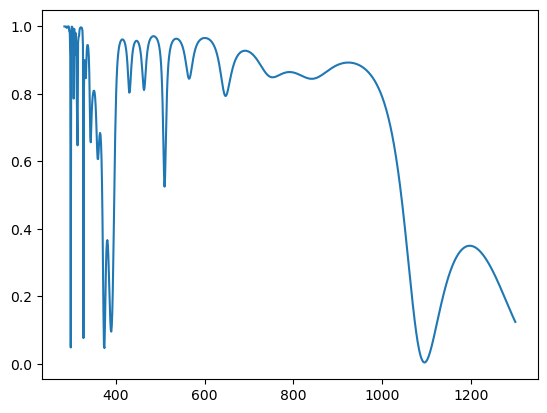

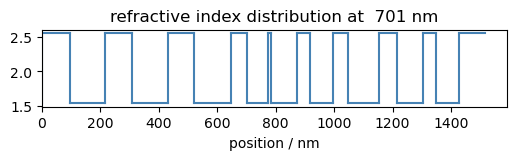

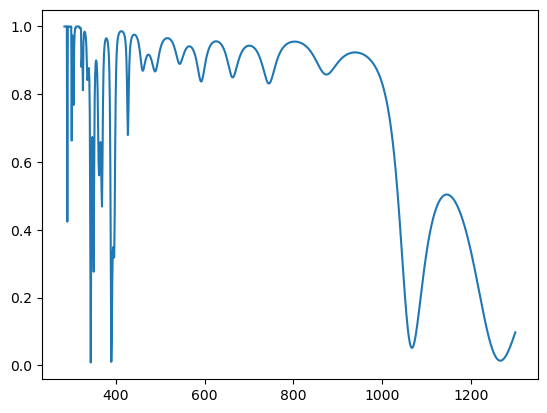

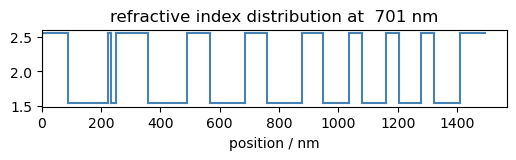

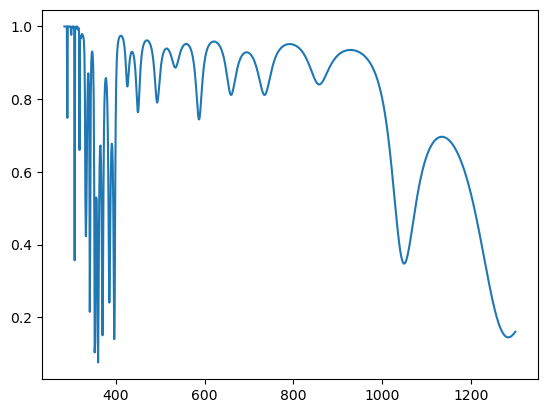

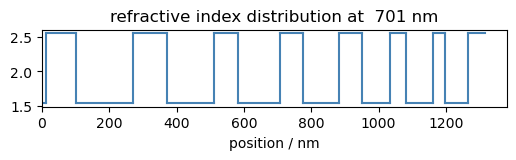

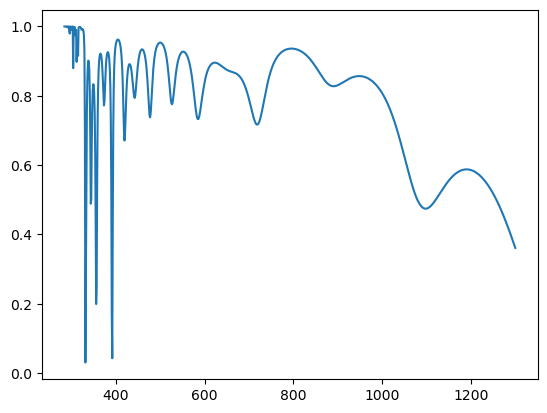

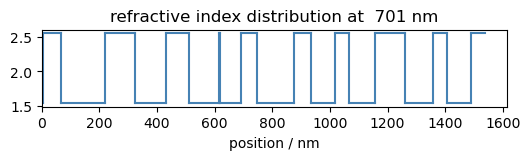

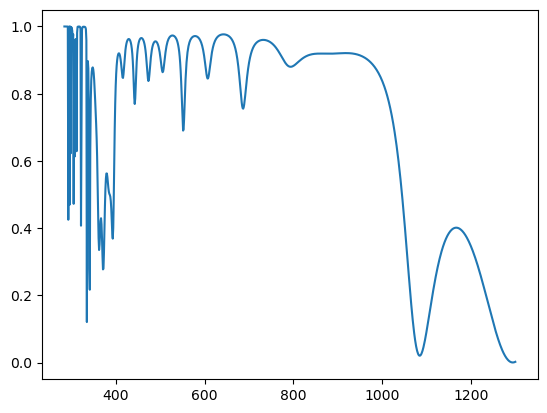

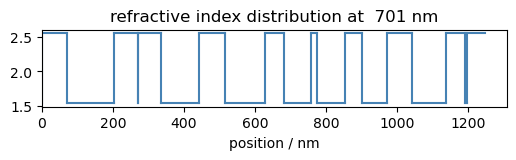

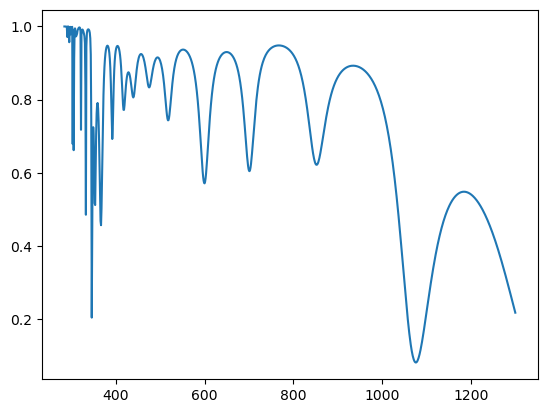

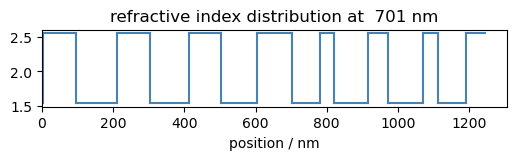

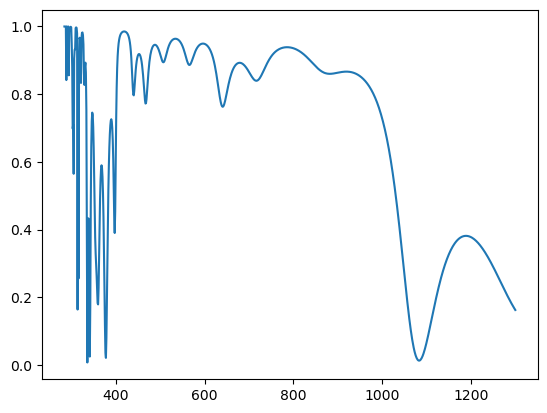

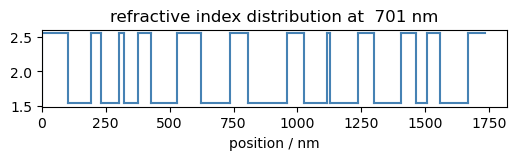

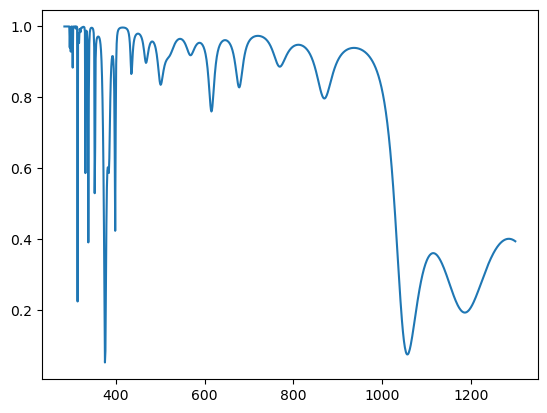

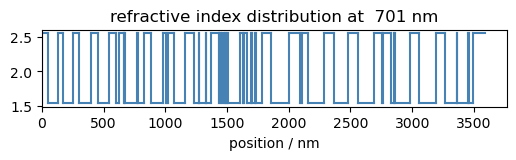

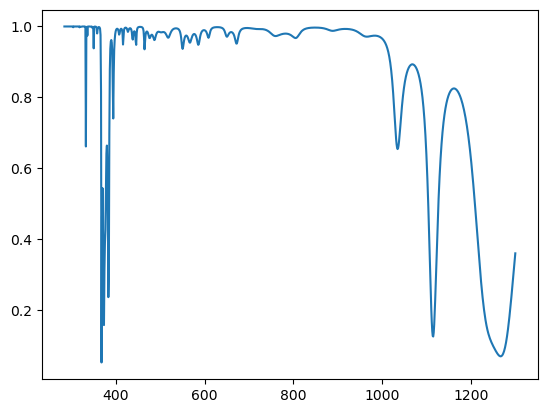

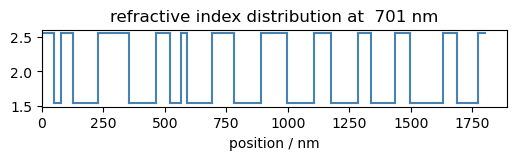

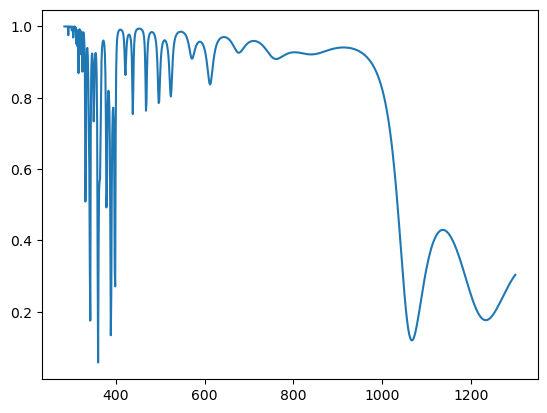

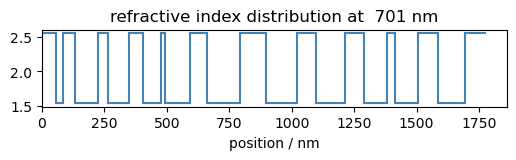

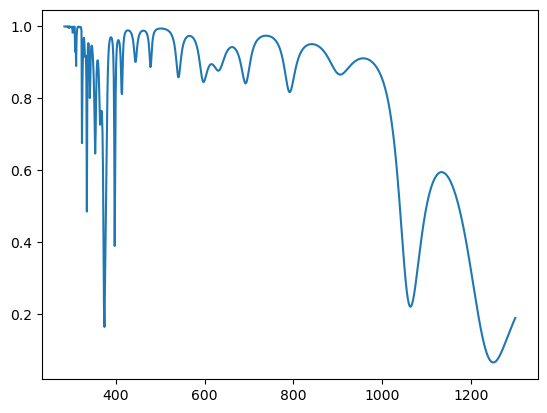

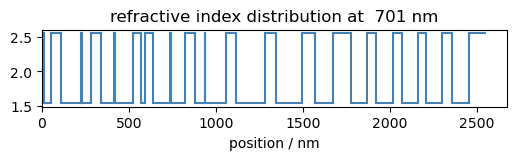

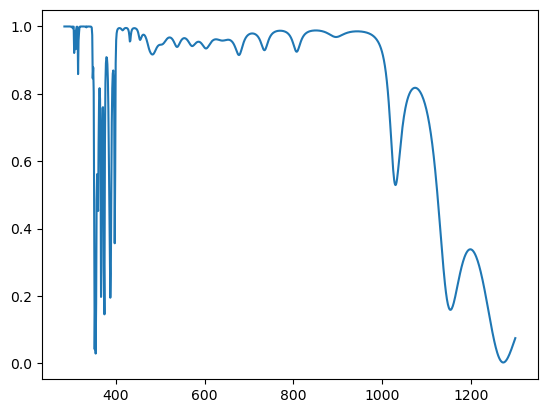

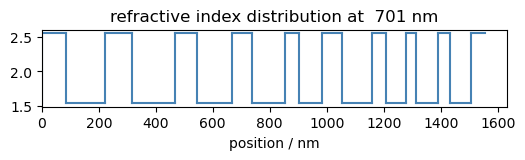

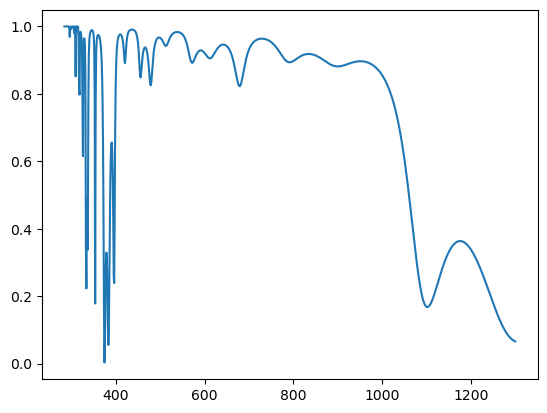

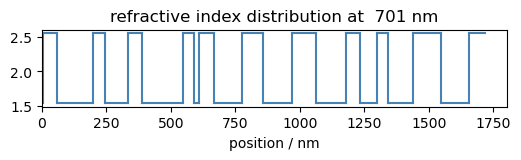

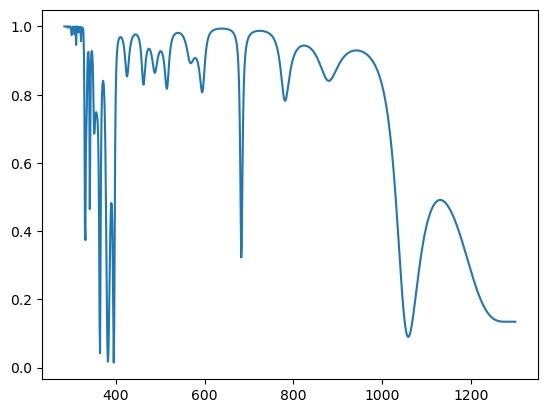

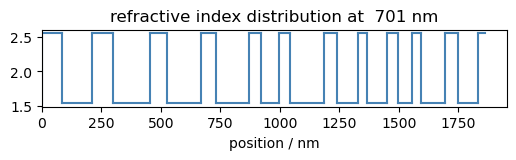

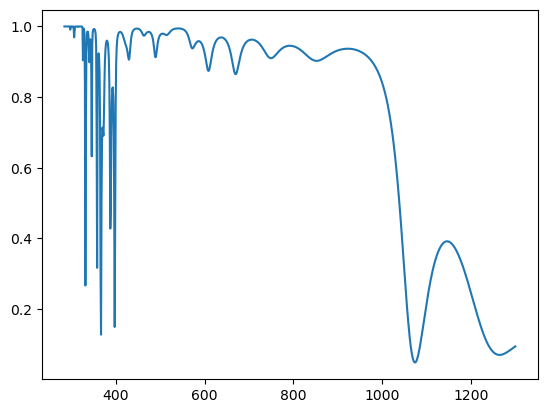

In [77]:
from analyze_utils.structure import plot_layer_thickness

def plot_deisgn(design):
    design.film.remove_negative_thickness_layer()
    print(f'init layer: {design.init_film.get_layer_number()}')
    print(f'init ot: {design.get_init_ot()}')
    print(f'loss: {design.calculate_loss()}')
    plot_layer_thickness(design.film)

dir = './raw_result/back_reflector/SiO2_TiO2-700to1000nm-700nm/'
layer = 190
import re
designs = load_designs(dir, lambda x: f'_layer{layer}_' in x and 3000 > float(re.match('ot(.*)_layer', x).group(1)) > 2500)

for design in designs:

    plot_deisgn(design)

    fig, ax = plt.subplots(1, 1)
    wls = np.linspace(200, 1300, 1000)
    ax.plot(wls, design.film.get_spec(inc_ang=0., wls=wls).get_R())